In [ ]:
!pip install pandas
!pip install scikit-learn statsmodels
!pip install numpy
!pip install matplotlib

In [15]:
#Step 1: import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Step 2: Provide the data
df = pd.read_csv('Walmart_Sales.csv')
print(df.head()) #print to see if data is loaded correctly
print(df.columns) #print to see the columns in the data

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


The columns are: ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
we are predicting sales, so we will use 'Weekly_Sales' as the target variable
we will use 'Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment' as the features
Since, we have two or more independent variables, we will do Multiple Linear Regression
The estimated regression function is 𝑓(𝑥₁, …, 𝑥ᵣ) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ +𝑏ᵣ𝑥ᵣ, and there are 𝑟 + 1 weights to be determined when the number of inputs is 𝑟.

Before doing multiple linear regression, we will do the simple one
First we will start by one independent variable x : Unemployment
# How does unemployment affect Walamart Sales

In [16]:
#Step 3: define the testing and training data
X = df[['Unemployment']]
y = df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# test size: 0.2 means 20% of the data will be used for testing and 80% for training
# random_state is a parameter in train_test_split that controls the random number generator used to shuffle the data before splitting it. 
# So, it ensures that the same randomization is used each time you run the code, resulting in the same splits of the data.

In [17]:
#Step 4: standardize the input 
scaler = StandardScaler() #(X-mean)/std
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled_full = scaler.transform(X)

Why are we standardizing the output?
This is also called feature scaling
1. It is not necessary
2. How is it beneficial? https://medium.com/@jazeem.lk/why-standardization-is-important-in-machine-learning-9b55a9e03d58


### Feature Scaling vs Feature Normalization



In [ ]:
#Step 4: create the model

#Use SGDRegressor
model = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
model.fit(X_train_scaled, y_train)

#max iter: maximum number of iterations to run
#learning rate: how much to change the model in response to the estimated error each time the model weights are updated
#eta0: initial learning rate for the 'constant' learning rate schedule



SGDRegressor(learning_rate='constant')

# Theory of learning_rate and eta

complete notes


# sklearn.linear_model models 
LinearRegression:  always uses the least-squares as a loss function.
SDGRegressor:  you can specify a loss function and it uses Stochastic Gradient Descent (SGD) to fit. For SGD you run the training set one data point at a time and update the parameters according to the error gradient.
Use linearregression when very large data
Use sdgregressor otherwise

Pipeline: complete notes

sklearn.preprocessing
StandardScalar: brings data to normal distribution (sd: 1 and mean:0 )


In [19]:
# you have the line now 
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-24162.10145606]
Intercept: [1003781.3174055]


[1002371.73098847 1002371.73098847 1002371.73098847 ...  995134.76249892
  995134.76249892  995134.76249892]


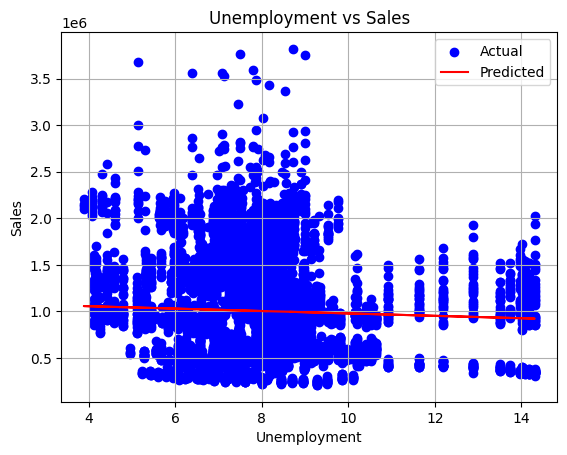

In [ ]:
# Visialize the results
# we are using scatter cause two variables -> easist way to see data
# if we had multiple x, use heatmap

plt.scatter(X, y, color='blue', label='Actual')

y_pred = model.predict(X_scaled_full)
print(y_pred)
plt.plot(X, y_pred, color='red', label='Predicted')

plt.xlabel('Unemployment')
plt.ylabel('Sales')
plt.title('Unemployment vs Sales')
plt.legend()
plt.grid(True)
plt.show()



##plot the orginal scatterplot and this side by side to see scaled values and etc


# Coefficient of Determination: R^2
# Mean Squared Error

Complete notes
